In [1]:
import sys
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.10.4 anndata==0.11.1 umap==0.5.6 numpy==1.26.4 scipy==1.11.4 pandas==2.2.3 scikit-learn==1.6.1 statsmodels==0.14.0 igraph==0.11.5 pynndescent==0.5.12


In [2]:
nr = sc.read_h5ad('./NR/V2L_NR_L23_filter.h5ad')
dr = sc.read_h5ad('./DR/V2L_DR_L23_filter.h5ad')

In [3]:
nr_ptime = pd.read_csv('./ptime/HVG_N_V2L_L23_pseudotime.txt',sep='\t')
dr_ptime = pd.read_csv('./ptime/HVG_D_V2L_L23_pseudotime.txt',sep='\t')

In [4]:
import seaborn as sns
sns.set_theme(style="ticks")

In [5]:
nr_exp=pd.DataFrame(nr.X.todense(),index=nr.obs.index,columns=nr.var.index)
nr_exp = nr_exp.reset_index()
nr_exp['cell_id_match'] = nr_exp['index'].str[:12]
df_ptime_nr = pd.merge(nr_exp, nr_ptime, left_on='cell_id_match', right_on='cell_id', how='left')

df_ptime_nr = df_ptime_nr.drop(columns=['cell_id_match', 'cell_id']).set_index('index')
df_ptime_nr = df_ptime_nr.dropna()
df_ptime_nr_sorted = df_ptime_nr.sort_values(by='velocity_pseudotime', ascending=True)


dr_exp=pd.DataFrame(dr.X.todense(),index=dr.obs.index,columns=dr.var.index)
dr_exp = dr_exp.reset_index()
dr_exp['cell_id_match'] = dr_exp['index'].str[:12]
df_ptime_dr = pd.merge(dr_exp, dr_ptime, left_on='cell_id_match', right_on='cell_id', how='left')

df_ptime_dr = df_ptime_dr.drop(columns=['cell_id_match', 'cell_id']).set_index('index')
df_ptime_dr = df_ptime_dr.dropna()
df_ptime_dr_sorted = df_ptime_dr.sort_values(by='velocity_pseudotime', ascending=True)

df_ptime_nr_sorted = df_ptime_nr.sort_values(by='velocity_pseudotime', ascending=True)
df_ptime_dr_sorted = df_ptime_dr.sort_values(by='velocity_pseudotime', ascending=True)
df_ptime_nr_sorted['index'] = range(df_ptime_nr_sorted.shape[0])
df_ptime_nr_sorted['index_bin'] = pd.cut(df_ptime_nr_sorted['index'], bins=np.arange(0, 4238 + 4238/100, 4238/100))
bin_means_nr = df_ptime_nr_sorted.groupby('index_bin').mean()
df_ptime_dr_sorted['index'] = range(df_ptime_dr_sorted.shape[0])
df_ptime_dr_sorted['index_bin'] = pd.cut(df_ptime_dr_sorted['index'], bins=np.arange(0, 4017 + 4017/100, 4017/100))
bin_means_dr = df_ptime_dr_sorted.groupby('index_bin').mean()
bin_means_nr['index'] = range(bin_means_nr.shape[0])
bin_means_dr['index'] = range(bin_means_dr.shape[0])

/var/folders/r4/hfj1yx3s3bd93mtgxzfwcfyc0000gn/T/ipykernel_11979/1280202486.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means_nr = df_ptime_nr_sorted.groupby('index_bin').mean()
/var/folders/r4/hfj1yx3s3bd93mtgxzfwcfyc0000gn/T/ipykernel_11979/1280202486.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means_dr = df_ptime_dr_sorted.groupby('index_bin').mean()


In [6]:
pc_gene = pd.read_csv('V2L_L23_Lasso_PC1rank.xls',sep='\t')

In [7]:
bin_means_nr_ = bin_means_nr
bin_means_nr_.index = list(bin_means_nr_['index'])
del bin_means_nr_['index']
bin_means_nr_T = bin_means_nr_.T

bin_means_dr_ = bin_means_dr
bin_means_dr_.index = list(bin_means_dr_['index'])
del bin_means_dr_['index']
bin_means_dr_T = bin_means_dr_.T

slope_ =[]
for i in range(bin_means_dr_T.shape[0]):
    x = np.array(bin_means_dr.index)
    y = np.array(bin_means_dr[bin_means_dr_T.index[i]])
    valid_indices = ~(np.isnan(x) | np.isnan(y) | np.isinf(x) | np.isinf(y))
    x = x[valid_indices]
    y = y[valid_indices]
    slope,intercept = np.polyfit(x, y,1)
    slope_.append(slope)
bin_means_dr_T['slope'] = slope_

slope_ =[]
for i in range(bin_means_nr_T.shape[0]):
    x = np.array(bin_means_nr.index)
    y = np.array(bin_means_nr[bin_means_nr_T.index[i]])
    valid_indices = ~(np.isnan(x) | np.isnan(y) | np.isinf(x) | np.isinf(y))
    x = x[valid_indices]
    y = y[valid_indices]
    slope,intercept = np.polyfit(x, y,1)
    slope_.append(slope)
bin_means_nr_T['slope'] = slope_

In [11]:
pc_gene

,Unnamed: 0,Gene,nr_pc_lasso,dr_pc_lasso,foldchange,logFC,NR_slope,NR_slope_abs,DR_slope,DR_slope_abs,NR_predicted_rank,DR_predicted_rank,NR_predicted_rank_final,DR_predicted_rank_final,foldchange_predicted,logFC_predicted,subclassdeglogFC,RCG
0,0,Nrbp2,291,386,1.325342,0.406365,0.000683,0.068280,0.000523,0.052253,391.226190,528.345085,291.0,386.000000,1.325342,0.406365,0.000000,Non_RCG
1,1,Unc5c,590,248,0.421320,-1.247012,-0.001395,0.139527,-0.002331,0.233134,252.646941,155.896836,590.0,248.000000,0.421320,-1.247012,0.000000,RCG
2,2,Kif13b,655,496,0.757622,-0.400450,-0.000177,0.017745,0.000384,0.038362,912.742584,651.898857,655.0,496.000000,0.757622,-0.400450,0.000000,Non_RCG
3,3,Nfia,178,436,2.441341,1.287674,0.001236,0.123644,0.000772,0.077192,281.475942,405.211725,178.0,436.000000,2.441341,1.287674,0.445133,RCG
4,4,Fam210a,441,620,1.404977,0.490547,0.000678,0.067817,-0.000487,0.048660,392.975872,554.571983,441.0,620.000000,1.404977,0.490547,0.000000,Non_RCG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,740,Tyrobp,2507,1428,0.569777,-0.811531,-0.000020,0.002026,0.000085,0.008466,1118.082060,1410.385256,2507.0,1428.000000,0.569777,-0.811531,0.000000,Non_RCG
741,741,Zfp608,110,134,1.216216,0.282400,0.002650,0.264957,0.002920,0.291968,142.393464,127.608040,110.0,134.000000,1.216216,0.282400,0.217387,Non_RCG
742,742,Lrrn1,482,224,0.465839,-1.102098,0.000315,0.031453,0.001346,0.134622,650.107980,254.123256,482.0,224.000000,0.465839,-1.102098,0.456286,RCG
743,743,Oprm1,241,4000,16.533058,4.047282,-0.000581,0.058077,-0.001926,0.192584,434.994147,184.789973,241.0,184.789973,0.767727,-0.381334,0.410333,Non_RCG


In [8]:
rcg = pc_gene[pc_gene['RCG'] == 'RCG']
rcg_gene = list(rcg['Gene'])
non_rcg = pc_gene[pc_gene['RCG'] == 'Non_RCG']
non_rcg_gene = list(non_rcg['Gene'])

In [9]:
RCG = []
for i in range(bin_means_nr_T.shape[0]):
    if bin_means_nr_T.index[i] in rcg_gene:
        RCG.append('RCG')
    elif bin_means_nr_T.index[i] in non_rcg_gene:
        RCG.append('Non_RCG')
    else:
        RCG.append('No')
bin_means_nr_T['RCG'] = RCG
nr_rcg = bin_means_nr_T[bin_means_nr_T['RCG'] == 'RCG']
nr_rcg_sorted = nr_rcg.sort_values(by='slope', ascending=True)
nr_non_rcg = bin_means_nr_T[bin_means_nr_T['RCG'] == 'Non_RCG']
nr_non_rcg_sorted = nr_non_rcg.sort_values(by='slope', ascending=True)

RCG = []
for i in range(bin_means_dr_T.shape[0]):
    if bin_means_dr_T.index[i] in rcg_gene:
        RCG.append('RCG')
    elif bin_means_dr_T.index[i] in non_rcg_gene:
        RCG.append('Non_RCG')
    else:
        RCG.append('No')
bin_means_dr_T['RCG'] = RCG
dr_rcg = bin_means_dr_T[bin_means_dr_T['RCG'] == 'RCG']
dr_non_rcg = bin_means_dr_T[bin_means_dr_T['RCG'] == 'Non_RCG']

rcg_df = pd.DataFrame()
rcg_df.index=list(nr_rcg_sorted.index)
rcg_df['RCG_order']= range(nr_rcg_sorted.shape[0])
rcg_dic = rcg_df.to_dict()

RCG_order = []
for i in range(dr_rcg.shape[0]):
    if dr_rcg.index[i] in rcg_dic['RCG_order'].keys():
        RCG_order.append(rcg_dic['RCG_order'][dr_rcg.index[i]])
dr_rcg['RCG_order'] = RCG_order
dr_rcg_sorted = dr_rcg.sort_values(by='RCG_order', ascending=True)

rcg_df = pd.DataFrame()
rcg_df.index=list(nr_non_rcg_sorted.index)
rcg_df['RCG_order']= range(nr_non_rcg_sorted.shape[0])
rcg_dic = rcg_df.to_dict()

RCG_order = []
for i in range(dr_non_rcg.shape[0]):
    if dr_non_rcg.index[i] in rcg_dic['RCG_order'].keys():
        RCG_order.append(rcg_dic['RCG_order'][dr_non_rcg.index[i]])
    else:
        RCG_order.append('No')
dr_non_rcg['RCG_order'] = RCG_order
dr_non_rcg = dr_non_rcg[dr_non_rcg['RCG_order'] != 'No']
dr_non_rcg_sorted = dr_non_rcg.sort_values(by='RCG_order', ascending=True)

/var/folders/r4/hfj1yx3s3bd93mtgxzfwcfyc0000gn/T/ipykernel_23247/4154996857.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_rcg['RCG_order'] = RCG_order
/var/folders/r4/hfj1yx3s3bd93mtgxzfwcfyc0000gn/T/ipykernel_23247/4154996857.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_non_rcg['RCG_order'] = RCG_order


In [10]:
from scipy.stats import zscore

In [11]:
rcg_pos = rcg[rcg['logFC_predicted'] > 0]
rcg_neg = rcg[rcg['logFC_predicted'] <= 0]
non_rcg_pos = non_rcg[non_rcg['logFC_predicted'] > 0]
non_rcg_neg = non_rcg[non_rcg['logFC_predicted'] <= 0]

In [16]:
rcg_pos

,Unnamed: 0,Gene,nr_pc_lasso,dr_pc_lasso,foldchange,logFC,NR_slope,NR_slope_abs,DR_slope,DR_slope_abs,NR_predicted_rank,DR_predicted_rank,NR_predicted_rank_final,DR_predicted_rank_final,foldchange_predicted,logFC_predicted,subclassdeglogFC,RCG
3,3,Nfia,178,436,2.441341,1.287674,0.001236,0.123644,0.000772,0.077192,281.475942,405.211725,178.0,436.000000,2.441341,1.287674,0.445133,RCG
12,12,Lpgat1,531,4000,7.520677,2.910862,0.000173,0.017272,-0.000054,0.005441,915.052632,1557.859980,531.0,1557.859980,2.930188,1.550993,0.348299,RCG
13,13,Picalm,349,843,2.411429,1.269888,0.000363,0.036253,-0.000031,0.003079,592.347351,1770.742062,349.0,843.000000,2.411429,1.269888,0.000000,RCG
14,14,Ncoa3,571,1237,2.164336,1.113924,0.000271,0.027060,-0.000077,0.007671,717.464452,1442.015769,571.0,1237.000000,2.164336,1.113924,0.000000,RCG
18,18,Agap1,55,130,2.339286,1.226068,0.004870,0.487016,0.002766,0.276600,82.626490,133.897516,55.0,130.000000,2.339286,1.226068,0.362965,RCG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,717,Tmem117,107,4000,37.046296,5.211257,0.002411,0.241091,0.001561,0.156080,154.933123,222.788188,107.0,222.788188,2.072113,1.051103,0.820554,RCG
721,721,Arl6ip1,505,1969,3.893281,1.960986,0.000480,0.048037,-0.000114,0.011369,492.591198,1319.857877,505.0,1969.000000,3.893281,1.960986,0.367080,RCG
727,727,St6galnac3,105,289,2.735849,1.451989,-0.003098,0.309791,0.001063,0.106337,123.818993,313.464338,105.0,289.000000,2.735849,1.451989,-0.236936,RCG
730,730,Arid1a,246,530,2.149798,1.104201,0.001322,0.132250,0.000438,0.043786,265.040972,595.830662,246.0,530.000000,2.149798,1.104201,0.388152,RCG


In [12]:
rcg_pos_gene = list(rcg_pos['Gene'])
rcg_neg_gene = list(rcg_neg['Gene'])

non_rcg_pos_gene = list(non_rcg_pos['Gene'])
non_rcg_neg_gene = list(non_rcg_neg['Gene'])

In [13]:
gene = []
for i in range(nr_rcg_sorted.shape[0]):
    if nr_rcg_sorted.index[i] in rcg_pos_gene:
        gene.append('RCG_pos')
    elif nr_rcg_sorted.index[i] in rcg_neg_gene:
        gene.append('RCG_neg')
nr_rcg_sorted['RCG_class'] = gene

gene = []
for i in range(dr_rcg_sorted.shape[0]):
    if dr_rcg_sorted.index[i] in rcg_pos_gene:
        gene.append('RCG_pos')
    elif dr_rcg_sorted.index[i] in rcg_neg_gene:
        gene.append('RCG_neg')
dr_rcg_sorted['RCG_class'] = gene

gene = []
for i in range(nr_non_rcg_sorted.shape[0]):
    if nr_non_rcg_sorted.index[i] in non_rcg_pos_gene:
        gene.append('RCG_pos')
    elif nr_non_rcg_sorted.index[i] in non_rcg_neg_gene:
        gene.append('RCG_neg')
nr_non_rcg_sorted['RCG_class'] = gene

gene = []
for i in range(dr_non_rcg_sorted.shape[0]):
    if dr_non_rcg_sorted.index[i] in non_rcg_pos_gene:
        gene.append('RCG_pos')
    elif dr_non_rcg_sorted.index[i] in non_rcg_neg_gene:
        gene.append('RCG_neg')
dr_non_rcg_sorted['RCG_class'] = gene

In [16]:
nr_rcg_sorted

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,slope,RCG,RCG_class
Hs6st3,3.578342,3.379573,3.490191,3.250511,3.284392,3.125900,3.231078,3.271540,3.306256,3.115592,...,2.225600,2.312739,2.171148,1.835106,1.715697,1.779552,1.594912,-0.011596,RCG,RCG_neg
Cntnap2,3.515059,3.316636,3.107047,3.155781,3.004039,2.921926,2.842646,2.760105,2.767750,2.609029,...,1.851417,1.961305,1.751763,1.677392,1.666018,1.629365,1.682401,-0.011143,RCG,RCG_neg
Unc5d,2.976042,3.093550,2.824728,3.001395,2.825282,2.827452,2.818488,2.949113,2.767466,2.975153,...,1.803041,1.911618,2.108091,2.192887,2.066850,2.054297,1.805200,-0.010041,RCG,RCG_pos
Brinp3,2.089909,1.520473,1.742116,1.233706,1.777714,1.776037,1.731408,1.450481,1.454794,1.611859,...,0.772264,0.797649,0.525000,0.645254,0.587842,0.587763,0.722448,-0.007941,RCG,RCG_pos
Kcnh5,1.445313,1.385048,1.237819,0.944813,1.012720,0.927245,0.967685,0.866239,0.903850,0.679280,...,0.333033,0.381715,0.128139,0.262197,0.106986,0.096990,0.019973,-0.007721,RCG,RCG_neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Egfem1,2.491886,2.415109,2.187387,2.113825,1.871074,2.019739,1.509795,1.823144,1.621716,1.543517,...,2.582987,2.406946,2.345726,2.036908,2.172575,1.545547,1.953527,0.008126,RCG,RCG_pos
Cntnap5a,1.601186,1.259390,1.650473,1.899347,1.533036,1.638558,1.387400,1.306776,1.464899,1.462636,...,2.297177,2.178222,2.117385,1.974019,1.901872,1.886338,1.986837,0.009639,RCG,RCG_pos
Dpyd,0.031540,0.032406,0.024966,0.000000,0.102197,0.024313,0.040830,0.000000,0.032623,0.136948,...,0.935000,1.173620,1.519020,1.857849,2.073670,1.658475,2.484931,0.009989,RCG,RCG_neg
Gpc6,0.844936,0.966586,1.297168,0.876303,1.328639,1.632814,1.907603,1.505649,1.498258,1.304185,...,2.764268,2.799134,2.697423,2.427032,2.352791,1.829710,2.056628,0.013961,RCG,RCG_pos


In [20]:
dr_rcg_sorted

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,slope,RCG,RCG_order,RCG_class
Hs6st3,3.411033,3.581137,3.526057,3.499050,3.354170,3.448829,3.257808,3.375144,3.196559,3.382571,...,1.744921,1.752522,1.836815,1.499616,1.544760,1.311010,-0.016668,RCG,0,RCG_neg
Cntnap2,3.776868,3.745732,3.502887,3.507192,3.415228,3.388668,3.503415,3.227378,3.152980,3.376352,...,1.789009,1.721557,1.889732,1.661270,1.820623,1.767952,-0.014691,RCG,1,RCG_neg
Unc5d,2.933089,2.906950,2.577697,2.823147,2.929016,2.735265,2.854607,2.890719,2.886189,2.495379,...,2.089547,2.223180,2.000194,2.068437,2.235630,2.182401,-0.007216,RCG,2,RCG_pos
Brinp3,1.782938,1.552847,1.599064,1.361801,1.167869,1.085610,0.803487,1.134768,1.006881,0.917008,...,1.034747,0.634562,0.554508,0.858062,0.915942,0.834196,-0.001828,RCG,3,RCG_pos
Kcnh5,1.686213,1.759681,1.932920,1.775344,1.718423,1.585873,1.588081,1.623819,1.495589,1.436884,...,0.065740,0.149770,0.268698,0.113816,0.000000,0.154804,-0.014330,RCG,4,RCG_neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Egfem1,2.819438,2.986993,2.718826,2.706440,2.801107,2.649477,2.740681,2.665201,2.238890,2.567551,...,2.066648,2.294097,2.306181,1.992079,2.037706,2.089329,-0.000075,RCG,191,RCG_pos
Cntnap5a,1.938965,2.092318,2.308779,2.294137,2.309580,2.537251,2.085572,2.482982,2.308829,2.366312,...,2.402021,2.110596,2.268636,2.043223,2.003036,1.607204,0.002099,RCG,192,RCG_pos
Dpyd,0.000000,0.000000,0.183467,0.085103,0.052985,0.078649,0.070960,0.070304,0.034949,0.067137,...,1.975195,2.175089,2.309929,2.324573,2.472199,2.485910,0.017801,RCG,193,RCG_neg
Gpc6,0.646047,0.933453,1.610100,1.620654,1.718357,1.638418,1.699894,1.842310,1.952405,1.987784,...,2.631684,2.503868,2.248927,1.963562,1.669773,1.987891,0.010168,RCG,194,RCG_pos


In [17]:
nr_rcg_sorted_pos

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,slope,RCG,RCG_class
Unc5d,2.976042,3.093550,2.824728,3.001395,2.825282,2.827452,2.818488,2.949113,2.767466,2.975153,...,1.803041,1.911618,2.108091,2.192887,2.066850,2.054297,1.805200,-0.010041,RCG,RCG_pos
Brinp3,2.089909,1.520473,1.742116,1.233706,1.777714,1.776037,1.731408,1.450481,1.454794,1.611859,...,0.772264,0.797649,0.525000,0.645254,0.587842,0.587763,0.722448,-0.007941,RCG,RCG_pos
Sorcs3,0.931709,0.839104,1.253778,1.065878,1.304022,1.257797,1.180238,1.124882,1.499785,1.483437,...,0.699041,0.362235,0.708450,0.815252,0.715244,1.262485,0.874857,-0.006852,RCG,RCG_pos
Nell1,0.133647,0.192908,0.425060,0.251301,0.515556,0.463716,0.171515,0.519560,0.499879,0.619525,...,0.030432,0.000000,0.153218,0.036475,0.094554,0.034338,0.080982,-0.005543,RCG,RCG_pos
Pcdh15,1.408346,1.461104,1.216239,1.298245,1.675026,1.819018,1.611429,1.570024,1.519220,1.843643,...,1.133321,1.433830,1.556109,1.803979,2.012463,2.141369,2.540494,-0.004275,RCG,RCG_pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Agap1,0.335775,0.281286,0.285139,0.317010,0.342833,0.298955,0.325878,0.331277,0.316051,0.130515,...,0.769096,0.916924,0.783767,0.689653,0.846695,0.536924,0.748482,0.004870,RCG,RCG_pos
Egfem1,2.491886,2.415109,2.187387,2.113825,1.871074,2.019739,1.509795,1.823144,1.621716,1.543517,...,2.582987,2.406946,2.345726,2.036908,2.172575,1.545547,1.953527,0.008126,RCG,RCG_pos
Cntnap5a,1.601186,1.259390,1.650473,1.899347,1.533036,1.638558,1.387400,1.306776,1.464899,1.462636,...,2.297177,2.178222,2.117385,1.974019,1.901872,1.886338,1.986837,0.009639,RCG,RCG_pos
Gpc6,0.844936,0.966586,1.297168,0.876303,1.328639,1.632814,1.907603,1.505649,1.498258,1.304185,...,2.764268,2.799134,2.697423,2.427032,2.352791,1.829710,2.056628,0.013961,RCG,RCG_pos


In [15]:
nr_rcg_sorted_pos = nr_rcg_sorted[nr_rcg_sorted['RCG_class'] == 'RCG_pos']
nr_rcg_sorted_neg = nr_rcg_sorted[nr_rcg_sorted['RCG_class'] == 'RCG_neg']


dr_rcg_sorted_pos = dr_rcg_sorted[dr_rcg_sorted['RCG_class'] == 'RCG_pos']
dr_rcg_sorted_neg = dr_rcg_sorted[dr_rcg_sorted['RCG_class'] == 'RCG_neg']


nr_non_rcg_sorted_pos = nr_non_rcg_sorted[nr_non_rcg_sorted['RCG_class'] == 'RCG_pos']
nr_non_rcg_sorted_neg = nr_non_rcg_sorted[nr_non_rcg_sorted['RCG_class'] == 'RCG_neg']


dr_non_rcg_sorted_pos = dr_non_rcg_sorted[dr_non_rcg_sorted['RCG_class'] == 'RCG_pos']
dr_non_rcg_sorted_neg = dr_non_rcg_sorted[dr_non_rcg_sorted['RCG_class'] == 'RCG_neg']


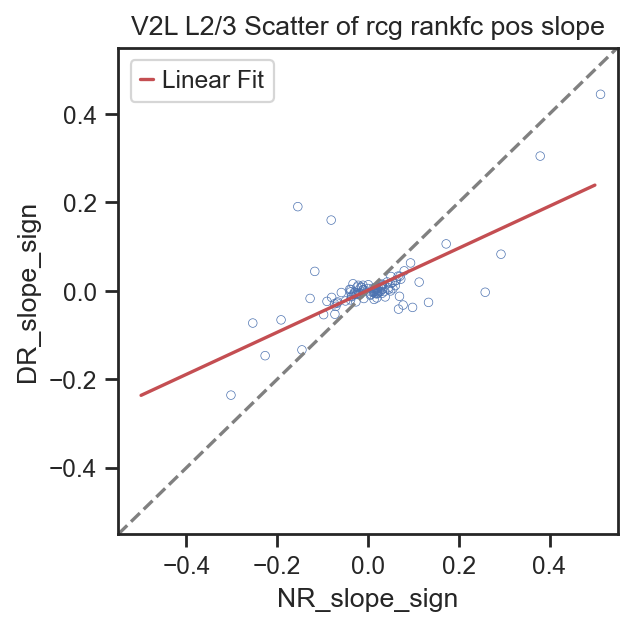

In [29]:
nr_dr_rcg_pos = pd.DataFrame()
nr_dr_rcg_pos.index = list(nr_rcg_sorted_pos.index)
nr_dr_rcg_pos['NR_slope'] = list(nr_rcg_sorted_pos['slope'])
nr_dr_rcg_pos['DR_slope'] = list(dr_rcg_sorted_pos['slope'])

nr_dr_rcg_pos['NR_slope*100'] = nr_dr_rcg_pos['NR_slope']*100
nr_dr_rcg_pos['DR_slope*100'] = nr_dr_rcg_pos['DR_slope']*100

nr_dr_rcg_pos['NR_slope_sign'] = np.log10(nr_dr_rcg_pos['NR_slope*100'].abs()+1)*np.sign(nr_dr_rcg_pos['NR_slope*100'])
nr_dr_rcg_pos['DR_slope_sign'] = np.log10(nr_dr_rcg_pos['DR_slope*100'].abs()+1)*np.sign(nr_dr_rcg_pos['DR_slope*100'])

fig, ax = plt.subplots(figsize=(4, 4))

scatter_plot = sns.scatterplot(
    data=nr_dr_rcg_pos,
    x='NR_slope_sign',
    y='DR_slope_sign',
    s=15,
    marker='o',
    edgecolor='b',
    facecolor='none',
    ax=ax
)

plt.title('V2L L2/3 Scatter of rcg rankfc pos slope')
plt.xlim(-0.55, 0.55)
plt.ylim(-0.55, 0.55)

limits = [-0.55, 0.55]
ax.plot(limits, limits, linestyle='--', color='gray')

x = nr_dr_rcg_pos['NR_slope_sign']
y = nr_dr_rcg_pos['DR_slope_sign']
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

x_fit = np.linspace(-0.5, 0.5, 100)
y_fit = slope * x_fit + intercept
ax.plot(x_fit, y_fit, color='r', label='Linear Fit')

plt.legend()

plt.savefig('V2L_L23_Scatter_of_rcg_slope_rankfc_posfit.pdf')

In [24]:
min(x)

-0.3019231416816238

In [25]:
max(x)

0.5124593151244198

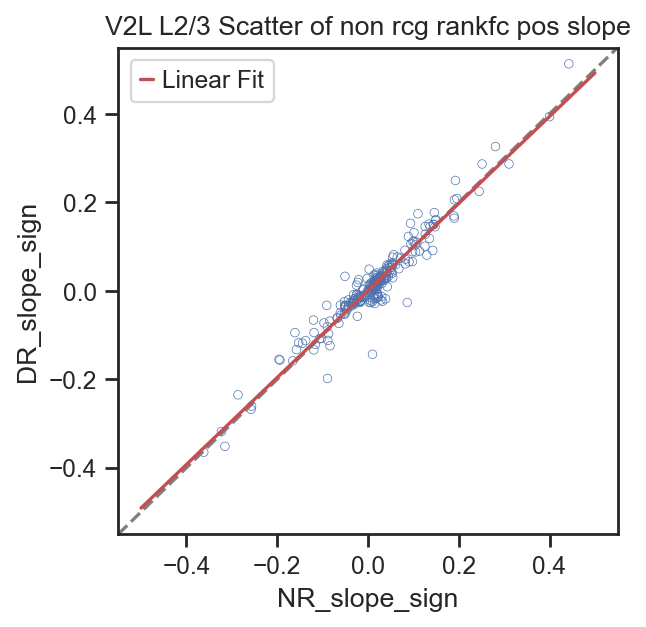

In [30]:
nr_dr_non_rcg_pos = pd.DataFrame()
nr_dr_non_rcg_pos.index = list(nr_non_rcg_sorted_pos.index)
nr_dr_non_rcg_pos['NR_slope'] = list(nr_non_rcg_sorted_pos['slope'])
nr_dr_non_rcg_pos['DR_slope'] = list(dr_non_rcg_sorted_pos['slope'])

nr_dr_non_rcg_pos['NR_slope*100'] = nr_dr_non_rcg_pos['NR_slope']*100
nr_dr_non_rcg_pos['DR_slope*100'] = nr_dr_non_rcg_pos['DR_slope']*100

nr_dr_non_rcg_pos['NR_slope_sign'] = np.log10(nr_dr_non_rcg_pos['NR_slope*100'].abs()+1)*np.sign(nr_dr_non_rcg_pos['NR_slope*100'])
nr_dr_non_rcg_pos['DR_slope_sign'] = np.log10(nr_dr_non_rcg_pos['DR_slope*100'].abs()+1)*np.sign(nr_dr_non_rcg_pos['DR_slope*100'])

fig, ax = plt.subplots(figsize=(4, 4))

scatter_plot = sns.scatterplot(
    data=nr_dr_non_rcg_pos,
    x='NR_slope_sign',
    y='DR_slope_sign',
    s=15,
    marker='o',
    edgecolor='b',
    facecolor='none',
    ax=ax
)

plt.title('V2L L2/3 Scatter of non rcg rankfc pos slope')
plt.xlim(-0.55, 0.55)
plt.ylim(-0.55, 0.55)

limits = [-0.55, 0.55]
ax.plot(limits, limits, linestyle='--', color='gray')

x = nr_dr_non_rcg_pos['NR_slope_sign']
y = nr_dr_non_rcg_pos['DR_slope_sign']
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

x_fit = np.linspace(-0.5, 0.5, 100)
y_fit = slope * x_fit + intercept
ax.plot(x_fit, y_fit, color='r', label='Linear Fit')

plt.legend()

plt.savefig('V2L_L23_Scatter_of_non_rcg_slope_rankfc_posfit.pdf')

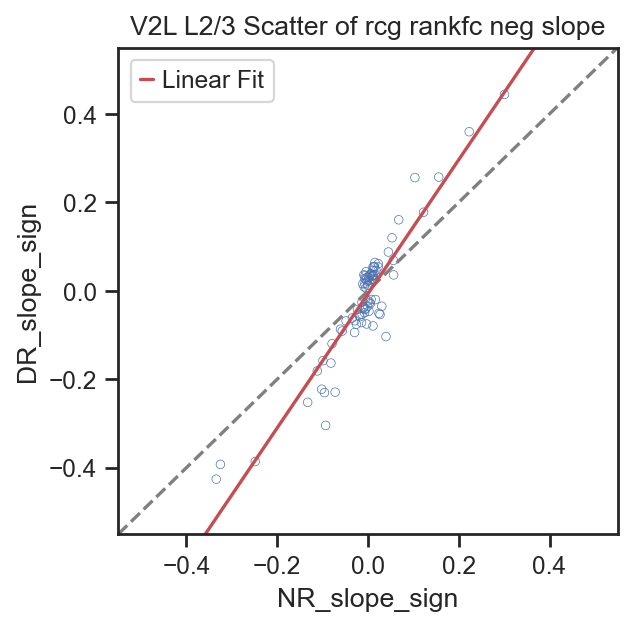

In [34]:
nr_dr_rcg_neg = pd.DataFrame()
nr_dr_rcg_neg.index = list(nr_rcg_sorted_neg.index)
nr_dr_rcg_neg['NR_slope'] = list(nr_rcg_sorted_neg['slope'])
nr_dr_rcg_neg['DR_slope'] = list(dr_rcg_sorted_neg['slope'])

nr_dr_rcg_neg['NR_slope*100'] = nr_dr_rcg_neg['NR_slope']*100
nr_dr_rcg_neg['DR_slope*100'] = nr_dr_rcg_neg['DR_slope']*100

nr_dr_rcg_neg['NR_slope_sign'] = np.log10(nr_dr_rcg_neg['NR_slope*100'].abs()+1)*np.sign(nr_dr_rcg_neg['NR_slope*100'])
nr_dr_rcg_neg['DR_slope_sign'] = np.log10(nr_dr_rcg_neg['DR_slope*100'].abs()+1)*np.sign(nr_dr_rcg_neg['DR_slope*100'])

fig, ax = plt.subplots(figsize=(4, 4))

scatter_plot = sns.scatterplot(
    data=nr_dr_rcg_neg,
    x='NR_slope_sign',
    y='DR_slope_sign',
    s=15,
    marker='o',
    edgecolor='b',
    facecolor='none',
    ax=ax
)

plt.title('V2L L2/3 Scatter of rcg rankfc neg slope')
plt.xlim(-0.55, 0.55)
plt.ylim(-0.55, 0.55)

limits = [-0.55, 0.55]
ax.plot(limits, limits, linestyle='--', color='gray')

x = nr_dr_rcg_neg['NR_slope_sign']
y = nr_dr_rcg_neg['DR_slope_sign']
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

x_fit = np.linspace(-0.5, 0.5, 100)
y_fit = slope * x_fit + intercept
ax.plot(x_fit, y_fit, color='r', label='Linear Fit')

plt.legend()

plt.savefig('V2L_L23_Scatter_of_rcg_slope_rankfc_neg_fit.pdf')

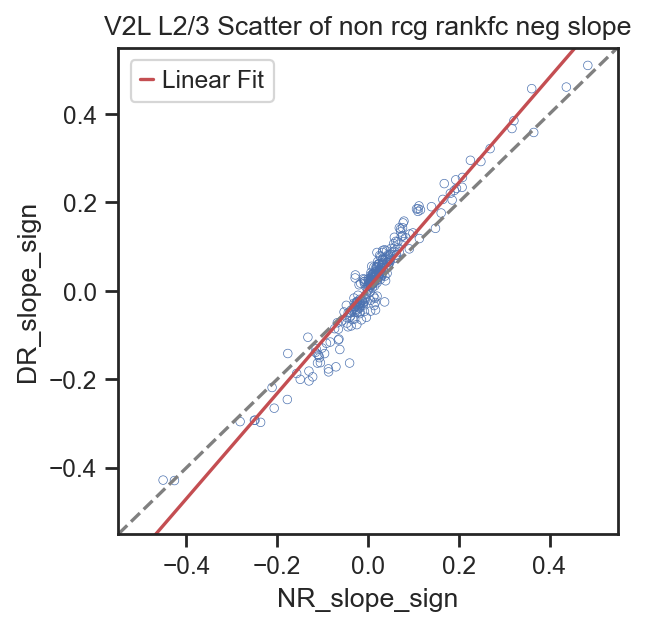

In [35]:
nr_dr_non_rcg_neg = pd.DataFrame()
nr_dr_non_rcg_neg.index = list(nr_non_rcg_sorted_neg.index)
nr_dr_non_rcg_neg['NR_slope'] = list(nr_non_rcg_sorted_neg['slope'])
nr_dr_non_rcg_neg['DR_slope'] = list(dr_non_rcg_sorted_neg['slope'])

nr_dr_non_rcg_neg['NR_slope*100'] = nr_dr_non_rcg_neg['NR_slope']*100
nr_dr_non_rcg_neg['DR_slope*100'] = nr_dr_non_rcg_neg['DR_slope']*100

nr_dr_non_rcg_neg['NR_slope_sign'] = np.log10(nr_dr_non_rcg_neg['NR_slope*100'].abs()+1)*np.sign(nr_dr_non_rcg_neg['NR_slope*100'])
nr_dr_non_rcg_neg['DR_slope_sign'] = np.log10(nr_dr_non_rcg_neg['DR_slope*100'].abs()+1)*np.sign(nr_dr_non_rcg_neg['DR_slope*100'])

fig, ax = plt.subplots(figsize=(4, 4))

scatter_plot = sns.scatterplot(
    data=nr_dr_non_rcg_neg,
    x='NR_slope_sign',
    y='DR_slope_sign',
    s=15,
    marker='o',
    edgecolor='b',
    facecolor='none',
    ax=ax
)

plt.title('V2L L2/3 Scatter of non rcg rankfc neg slope')
plt.xlim(-0.55, 0.55)
plt.ylim(-0.55, 0.55)

limits = [-0.55, 0.55]
ax.plot(limits, limits, linestyle='--', color='gray')

x = nr_dr_non_rcg_neg['NR_slope_sign']
y = nr_dr_non_rcg_neg['DR_slope_sign']
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

x_fit = np.linspace(-0.5, 0.5, 100)
y_fit = slope * x_fit + intercept
ax.plot(x_fit, y_fit, color='r', label='Linear Fit')

plt.legend()
plt.savefig('V2L_L23_Scatter_of_non_rcg_slope_rankfc_neg_fit.pdf')

In [18]:
nr_rcg_sorted_pos = nr_rcg_sorted_pos.sort_values(by='slope', ascending=True)

rcg_df = pd.DataFrame()
rcg_df.index=list(nr_rcg_sorted_pos.index)
rcg_df['RCG_order']= range(nr_rcg_sorted_pos.shape[0])
rcg_dic = rcg_df.to_dict()

RCG_order = []
for i in range(dr_rcg_sorted_pos.shape[0]):
    if dr_rcg_sorted_pos.index[i] in rcg_dic['RCG_order'].keys():
        RCG_order.append(rcg_dic['RCG_order'][dr_rcg_sorted_pos.index[i]])
dr_rcg_sorted_pos['RCG_order'] = RCG_order
dr_rcg_sorted_pos = dr_rcg_sorted_pos.sort_values(by='RCG_order', ascending=True)

dr_rcg_sorted_neg = dr_rcg_sorted_neg.sort_values(by='slope', ascending=True)
rcg_df = pd.DataFrame()
rcg_df.index=list(dr_rcg_sorted_neg.index)
rcg_df['RCG_order']= range(dr_rcg_sorted_neg.shape[0])
rcg_dic = rcg_df.to_dict()

RCG_order = []
for i in range(nr_rcg_sorted_neg.shape[0]):
    if nr_rcg_sorted_neg.index[i] in rcg_dic['RCG_order'].keys():
        RCG_order.append(rcg_dic['RCG_order'][nr_rcg_sorted_neg.index[i]])
    else:
        RCG_order.append('No')
nr_rcg_sorted_neg['RCG_order'] = RCG_order
nr_rcg_sorted_neg = nr_rcg_sorted_neg[nr_rcg_sorted_neg['RCG_order'] != 'No']
nr_rcg_sorted_neg = nr_rcg_sorted_neg.sort_values(by='RCG_order', ascending=True)

/var/folders/r4/hfj1yx3s3bd93mtgxzfwcfyc0000gn/T/ipykernel_23247/2106222261.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_rcg_sorted_pos['RCG_order'] = RCG_order
/var/folders/r4/hfj1yx3s3bd93mtgxzfwcfyc0000gn/T/ipykernel_23247/2106222261.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nr_rcg_sorted_neg['RCG_order'] = RCG_order


In [16]:
nr_rcg_sorted_pos = nr_rcg_sorted_pos.iloc[:, :100]
nr_rcg_sorted_neg = nr_rcg_sorted_neg.iloc[:, :100]

dr_rcg_sorted_pos = dr_rcg_sorted_pos.iloc[:, :100]
dr_rcg_sorted_neg = dr_rcg_sorted_neg.iloc[:, :100]

nr_non_rcg_sorted_pos = nr_non_rcg_sorted_pos.iloc[:, :100]
nr_non_rcg_sorted_neg = nr_non_rcg_sorted_neg.iloc[:, :100]

dr_non_rcg_sorted_pos = dr_non_rcg_sorted_pos.iloc[:, :100]
dr_non_rcg_sorted_neg = dr_non_rcg_sorted_neg.iloc[:, :100]

In [25]:
nr_rcg_sorted_pos

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Unc5d,2.976042,3.093550,2.824728,3.001395,2.825282,2.827452,2.818488,2.949113,2.767466,2.975153,...,2.028244,2.045649,1.950305,1.803041,1.911618,2.108091,2.192887,2.066850,2.054297,1.805200
Brinp3,2.089909,1.520473,1.742116,1.233706,1.777714,1.776037,1.731408,1.450481,1.454794,1.611859,...,1.121430,0.926590,0.619543,0.772264,0.797649,0.525000,0.645254,0.587842,0.587763,0.722448
Sorcs3,0.931709,0.839104,1.253778,1.065878,1.304022,1.257797,1.180238,1.124882,1.499785,1.483437,...,0.556929,0.557249,0.399320,0.699041,0.362235,0.708450,0.815252,0.715244,1.262485,0.874857
Nell1,0.133647,0.192908,0.425060,0.251301,0.515556,0.463716,0.171515,0.519560,0.499879,0.619525,...,0.053050,0.213551,0.000000,0.030432,0.000000,0.153218,0.036475,0.094554,0.034338,0.080982
Pcdh15,1.408346,1.461104,1.216239,1.298245,1.675026,1.819018,1.611429,1.570024,1.519220,1.843643,...,1.392408,1.429075,1.250118,1.133321,1.433830,1.556109,1.803979,2.012463,2.141369,2.540494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Agap1,0.335775,0.281286,0.285139,0.317010,0.342833,0.298955,0.325878,0.331277,0.316051,0.130515,...,0.636364,0.761854,0.947535,0.769096,0.916924,0.783767,0.689653,0.846695,0.536924,0.748482
Egfem1,2.491886,2.415109,2.187387,2.113825,1.871074,2.019739,1.509795,1.823144,1.621716,1.543517,...,2.515357,2.691556,2.429604,2.582987,2.406946,2.345726,2.036908,2.172575,1.545547,1.953527
Cntnap5a,1.601186,1.259390,1.650473,1.899347,1.533036,1.638558,1.387400,1.306776,1.464899,1.462636,...,2.267491,2.430912,2.172587,2.297177,2.178222,2.117385,1.974019,1.901872,1.886338,1.986837
Gpc6,0.844936,0.966586,1.297168,0.876303,1.328639,1.632814,1.907603,1.505649,1.498258,1.304185,...,2.829087,2.859075,2.906564,2.764268,2.799134,2.697423,2.427032,2.352791,1.829710,2.056628


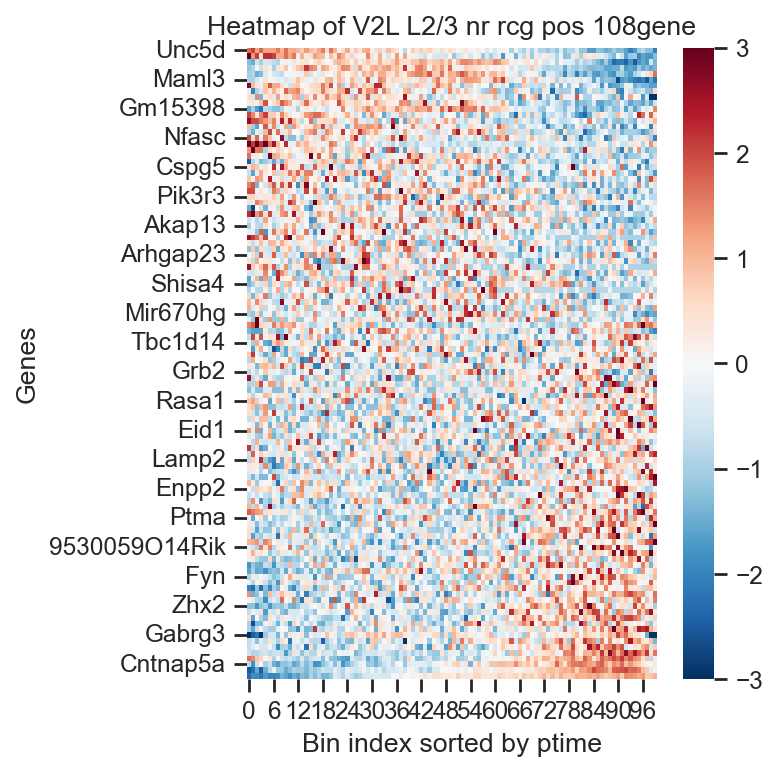

In [24]:
nr_rcg_sorted_pos_zscore = nr_rcg_sorted_pos.apply(zscore, axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(nr_rcg_sorted_pos_zscore, cmap='RdBu_r', fmt='.2f',vmin=-3,vmax=3)
plt.title('Heatmap of V2L L2/3 nr rcg pos 108gene')
plt.xlabel('Bin index sorted by ptime')
plt.ylabel('Genes')
plt.tight_layout()
plt.savefig('Heatmap_of_V2L_L23_NR_RCG_pos_sorterd.pdf')

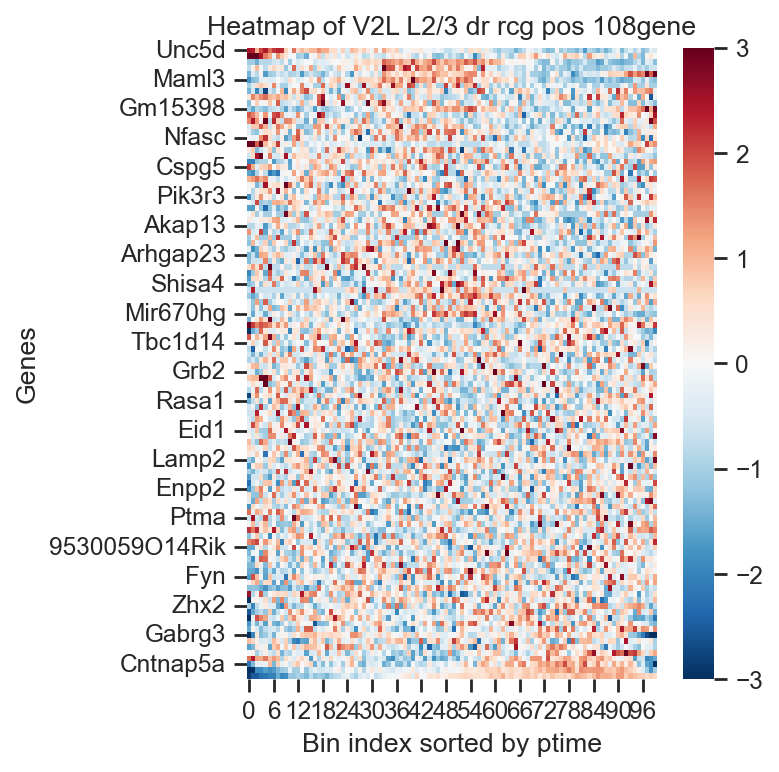

In [26]:
dr_rcg_sorted_pos_zscore = dr_rcg_sorted_pos.apply(zscore, axis=1)

plt.figure(figsize=(5,5))
sns.heatmap(dr_rcg_sorted_pos_zscore, cmap='RdBu_r', fmt='.2f',vmin=-3,vmax=3)
plt.title('Heatmap of V2L L2/3 dr rcg pos 108gene')
plt.xlabel('Bin index sorted by ptime')
plt.ylabel('Genes')
plt.tight_layout()
plt.savefig('Heatmap_of_V2L_L23_DR_RCG_pos_sorterd.pdf')

In [42]:
nr_non_rcg_sorted_pos

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Slc24a2,1.901281,1.947827,2.252198,1.819324,1.773333,2.368797,2.072129,2.083551,2.256603,2.193380,...,1.375636,0.949008,0.959136,1.024886,1.122686,0.885818,0.939754,0.752107,0.876851,1.007609
Pde7b,1.521405,1.692135,1.887266,1.586971,1.639854,1.834156,1.647328,1.487594,1.431384,1.609138,...,0.809994,0.917453,0.984028,0.562863,0.792266,0.636477,0.356111,0.223758,0.420791,0.262271
Frmd5,1.965051,1.711677,2.215325,2.197862,2.240985,1.808838,2.257834,1.963358,2.088239,2.084097,...,1.422032,1.287902,1.309152,0.843905,0.967699,1.066733,1.171962,0.846632,0.567791,0.467771
Sema6d,1.932684,1.402737,1.501933,1.297272,1.441311,1.422865,1.411441,1.287079,1.200666,0.914883,...,0.223106,0.530519,0.227780,0.478098,0.216068,0.460969,0.393596,0.602806,0.737274,0.916587
Slc9a9,1.584929,1.347831,1.289389,1.428268,1.387471,1.562671,1.477836,1.601736,1.757908,1.527004,...,0.847970,0.749189,0.899370,0.748452,0.599928,0.717273,0.768847,0.738048,0.309707,0.434150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mgat4c,0.307404,0.172464,0.259098,0.344059,0.348869,0.448188,0.307682,0.248200,0.369739,0.314188,...,1.118195,1.070397,1.015767,1.389129,1.314866,1.311234,1.298486,1.062640,1.425229,1.105267
4930419G24Rik,0.732111,1.056989,0.626728,0.464781,0.536192,0.753384,0.678548,0.862055,0.598345,0.825177,...,1.675535,1.513572,1.567872,1.630845,1.566374,1.883956,1.682554,1.509086,1.713800,1.695158
Dscaml1,0.589295,0.496823,0.425259,0.468801,0.426411,0.656343,0.605422,0.580109,0.551843,0.539533,...,1.802078,1.551145,1.741232,1.817958,1.806354,1.450965,1.452156,1.622095,1.244200,1.757130
Ptprk,0.460745,0.530988,0.549924,0.645009,0.614160,0.712746,0.869050,0.622077,0.765720,0.826948,...,1.901912,2.282225,2.033921,2.181611,1.935141,2.018129,1.963068,2.046136,1.953926,2.115772


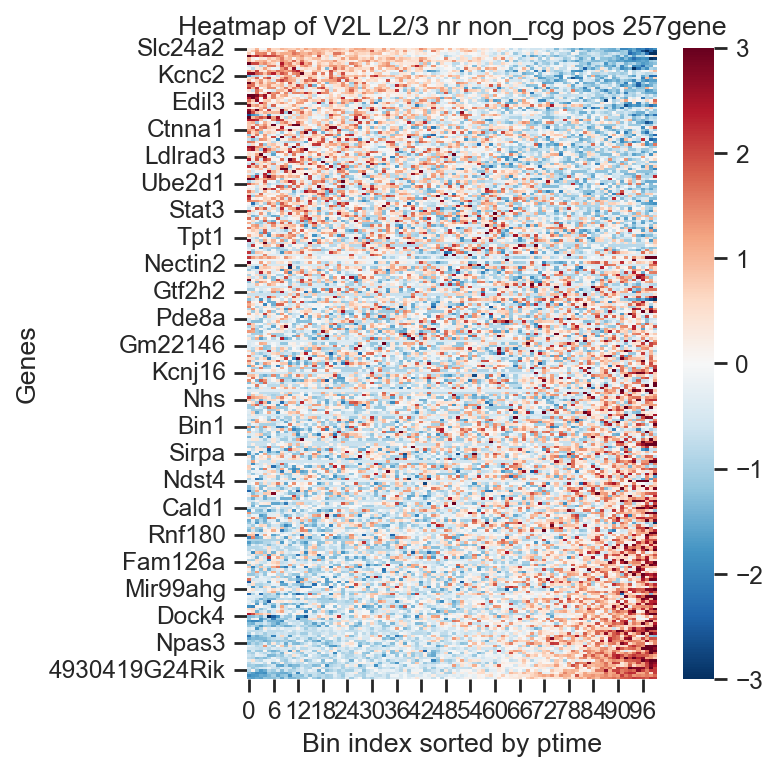

In [43]:
nr_non_rcg_sorted_pos_zscore = nr_non_rcg_sorted_pos.apply(zscore, axis=1)

plt.figure(figsize=(5,5))
sns.heatmap(nr_non_rcg_sorted_pos_zscore, cmap='RdBu_r', fmt='.2f',vmin=-3,vmax=3)
plt.title('Heatmap of V2L L2/3 nr non_rcg pos 257gene')
plt.xlabel('Bin index sorted by ptime')
plt.ylabel('Genes')
plt.tight_layout()
plt.savefig('Heatmap_of_V2L_L23_NR_non_RCG_pos_sorterd.pdf')

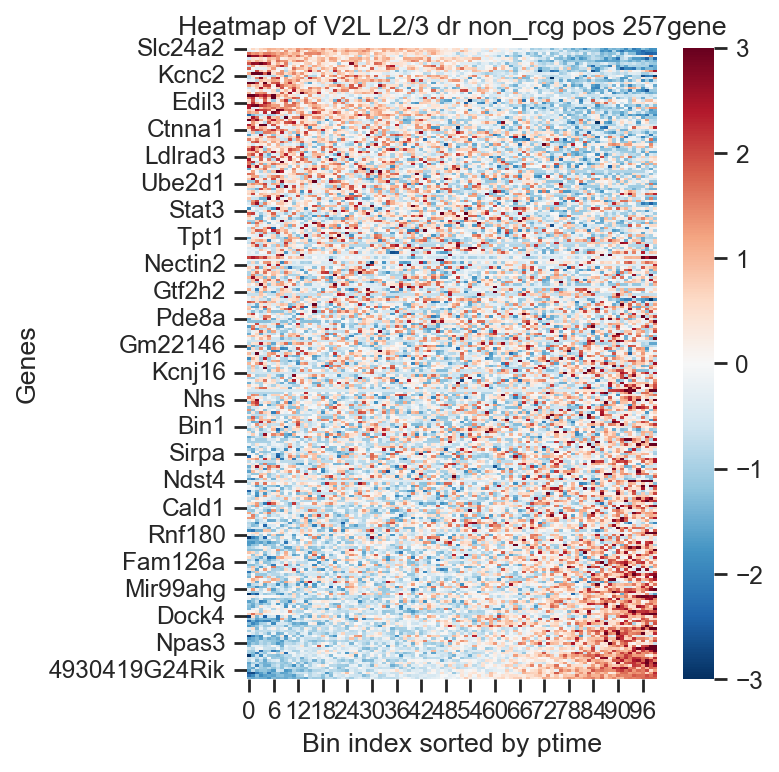

In [44]:
dr_non_rcg_sorted_pos_zscore = dr_non_rcg_sorted_pos.apply(zscore, axis=1)

plt.figure(figsize=(5,5))
sns.heatmap(dr_non_rcg_sorted_pos_zscore, cmap='RdBu_r', fmt='.2f',vmin=-3,vmax=3)
plt.title('Heatmap of V2L L2/3 dr non_rcg pos 257gene')
plt.xlabel('Bin index sorted by ptime')
plt.ylabel('Genes')
plt.tight_layout()

plt.savefig('Heatmap_of_V2L_L23_DR_non_RCG_pos_sorterd.pdf')

In [17]:
nr_rcg_sorted_neg

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Hs6st3,3.578342,3.379573,3.490191,3.250511,3.284392,3.125900,3.231078,3.271540,3.306256,3.115592,...,2.671760,2.132721,2.328950,2.225600,2.312739,2.171148,1.835106,1.715697,1.779552,1.594912
Cntnap2,3.515059,3.316636,3.107047,3.155781,3.004039,2.921926,2.842646,2.760105,2.767750,2.609029,...,2.075012,1.856069,2.006862,1.851417,1.961305,1.751763,1.677392,1.666018,1.629365,1.682401
Kcnh5,1.445313,1.385048,1.237819,0.944813,1.012720,0.927245,0.967685,0.866239,0.903850,0.679280,...,0.162274,0.441371,0.280274,0.333033,0.381715,0.128139,0.262197,0.106986,0.096990,0.019973
Kctd8,0.673886,0.681979,0.683231,0.536890,0.764209,0.413699,0.308535,0.442378,0.424588,0.189176,...,0.086285,0.067127,0.121094,0.154639,0.088789,0.082037,0.000000,0.186404,0.130474,0.234145
Rorb,0.970763,0.959565,0.509621,0.650311,0.890614,0.686607,0.348029,0.453778,0.392538,0.442026,...,0.173063,0.201833,0.093772,0.045613,0.117271,0.000000,0.216218,0.154624,0.160406,0.110338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Arhgap6,0.034145,0.028434,0.000000,0.033116,0.128076,0.078290,0.052897,0.095769,0.000000,0.038752,...,0.184352,0.272197,0.295626,0.220487,0.523080,0.399668,0.633784,0.600220,0.459268,0.827423
9530026P05Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.028541,0.192050,0.142801,0.207883,0.214153,0.406241,0.265208,0.339013,0.798260,0.690273
Zfp804b,0.058454,0.195855,0.030028,0.040706,0.133234,0.157025,0.176035,0.069938,0.276970,0.282403,...,0.375758,0.412692,0.606883,0.240320,0.460778,0.664634,0.357568,0.469043,0.478711,0.715913
Gm32647,0.029076,0.036280,0.071646,0.032966,0.033187,0.052531,0.045713,0.030782,0.037446,0.078710,...,0.246050,0.512132,0.401969,0.532570,0.610880,0.441650,0.760698,1.052125,1.803038,1.551737


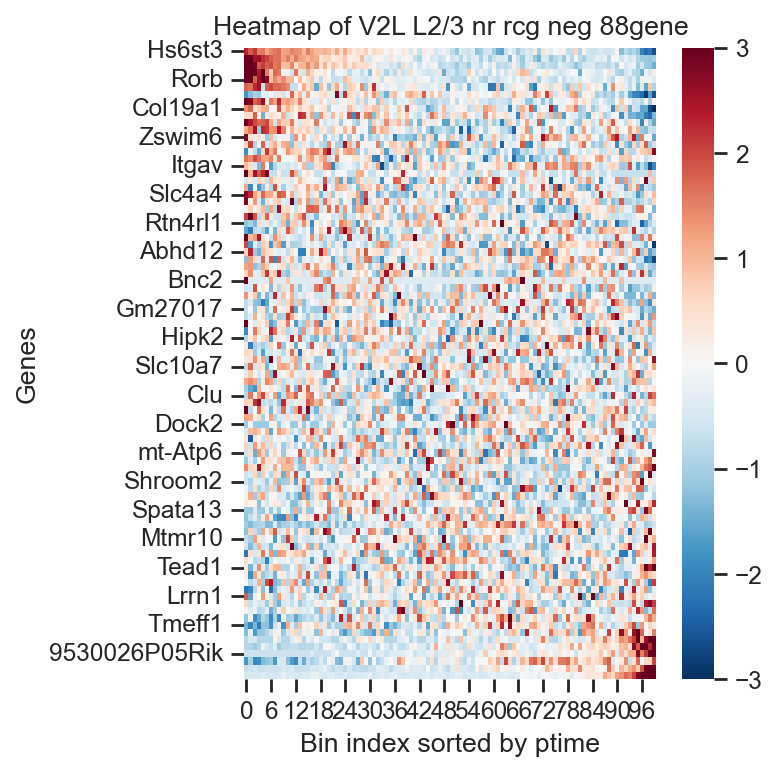

In [18]:
nr_rcg_sorted_neg_zscore = nr_rcg_sorted_neg.apply(zscore, axis=1)

plt.figure(figsize=(5,5))
sns.heatmap(nr_rcg_sorted_neg_zscore, cmap='RdBu_r', fmt='.2f',vmin=-3,vmax=3)
plt.title('Heatmap of V2L L2/3 nr rcg neg 88gene')
plt.xlabel('Bin index sorted by ptime')
plt.ylabel('Genes')
plt.tight_layout()

plt.savefig('Heatmap_of_V2L_L23_NR_RCG_neg_sorterd.pdf')

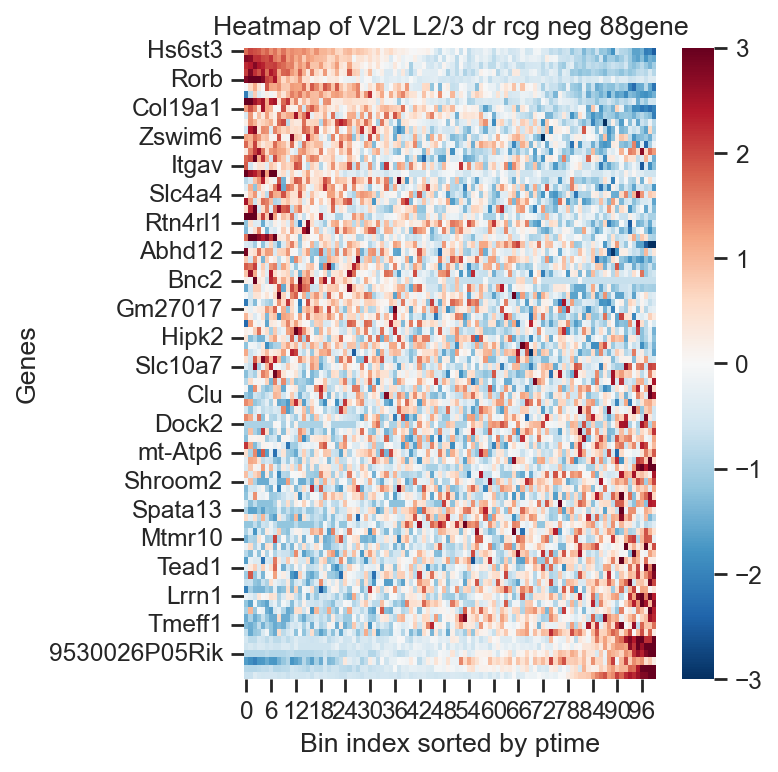

In [19]:
dr_rcg_sorted_neg_zscore = dr_rcg_sorted_neg.apply(zscore, axis=1)

plt.figure(figsize=(5,5))
sns.heatmap(dr_rcg_sorted_neg_zscore, cmap='RdBu_r', fmt='.2f',vmin=-3,vmax=3)
plt.title('Heatmap of V2L L2/3 dr rcg neg 88gene')
plt.xlabel('Bin index sorted by ptime')
plt.ylabel('Genes')
plt.tight_layout()

plt.savefig('Heatmap_of_V2L_L23_DR_RCG_neg_sorterd.pdf')

In [48]:
nr_non_rcg_sorted_neg

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Etl4,2.517990,2.299227,2.205330,2.255126,2.344445,2.162281,2.304191,2.119729,2.242942,2.248152,...,0.553560,0.572826,0.518464,0.652855,0.444727,0.576667,0.468969,0.434908,0.457387,0.313370
Kcnq5,3.397494,3.452586,3.465416,3.503183,3.296808,3.314879,3.375728,3.246964,3.365779,3.132836,...,1.946399,1.658728,2.006816,1.793047,1.848295,1.688515,1.533186,1.778084,1.749033,1.799781
Prr16,1.876916,1.914645,1.668732,1.652133,1.553252,1.499878,1.711099,1.669318,1.403045,1.414219,...,0.600657,0.632840,0.580301,0.664215,0.513729,0.744704,0.644826,0.455996,0.651591,0.768633
Mast4,1.914176,1.977568,1.538164,1.687651,1.768278,1.801434,1.706463,1.749233,1.883984,1.680540,...,1.254641,1.021655,1.122393,0.739262,0.833263,0.857491,0.926530,0.631866,0.748057,0.607757
Alcam,1.663235,1.930353,1.275828,1.816529,1.657721,1.209050,1.692057,1.667615,1.738800,1.353218,...,0.581862,0.833228,1.017518,1.057496,0.877122,0.714108,0.927290,0.963361,0.669366,0.752021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6530403H02Rik,0.000000,0.000000,0.036049,0.000000,0.027313,0.000000,0.033961,0.029348,0.025410,0.000000,...,1.004272,0.978801,1.244664,1.452425,1.691243,1.473148,1.646588,1.638992,1.606598,1.901180
Tafa1,1.677684,1.985670,2.165132,1.990953,2.166878,2.074802,2.473334,2.319360,2.433963,2.503027,...,3.653002,3.298940,3.556734,3.599913,3.379504,3.375943,3.219538,3.130743,2.589486,2.697697
Epha6,1.276098,1.207394,0.705626,1.033755,1.022579,1.237935,1.033614,1.112007,1.011225,1.114227,...,2.462906,2.526100,2.689827,2.773299,2.833688,2.353202,2.336947,2.739824,2.835411,2.957677
Cntn5,0.628466,0.857261,0.659913,0.599530,0.563225,0.844582,0.498736,0.565863,0.654924,0.588386,...,2.001119,2.384536,2.370531,2.369254,2.560750,2.654647,2.702972,2.880572,3.119560,3.211836


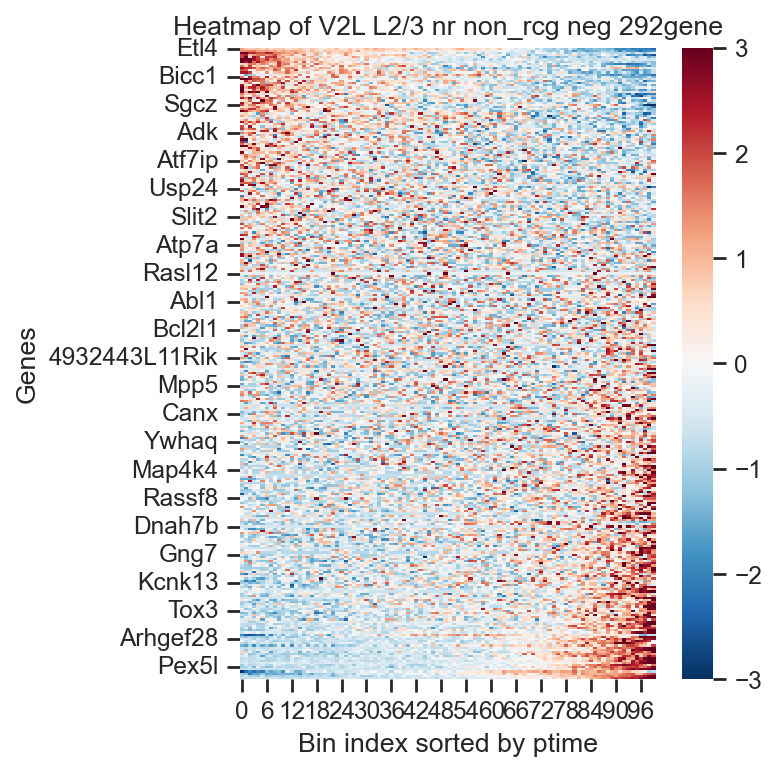

In [49]:
nr_non_rcg_sorted_neg_zscore = nr_non_rcg_sorted_neg.apply(zscore, axis=1)

plt.figure(figsize=(5,5))
sns.heatmap(nr_non_rcg_sorted_neg_zscore, cmap='RdBu_r', fmt='.2f',vmin=-3,vmax=3)
plt.title('Heatmap of V2L L2/3 nr non_rcg neg 292gene')
plt.xlabel('Bin index sorted by ptime')
plt.ylabel('Genes')
plt.tight_layout()

plt.savefig('Heatmap_of_V2L_L23_NR_non_RCG_neg_sorterd.pdf')

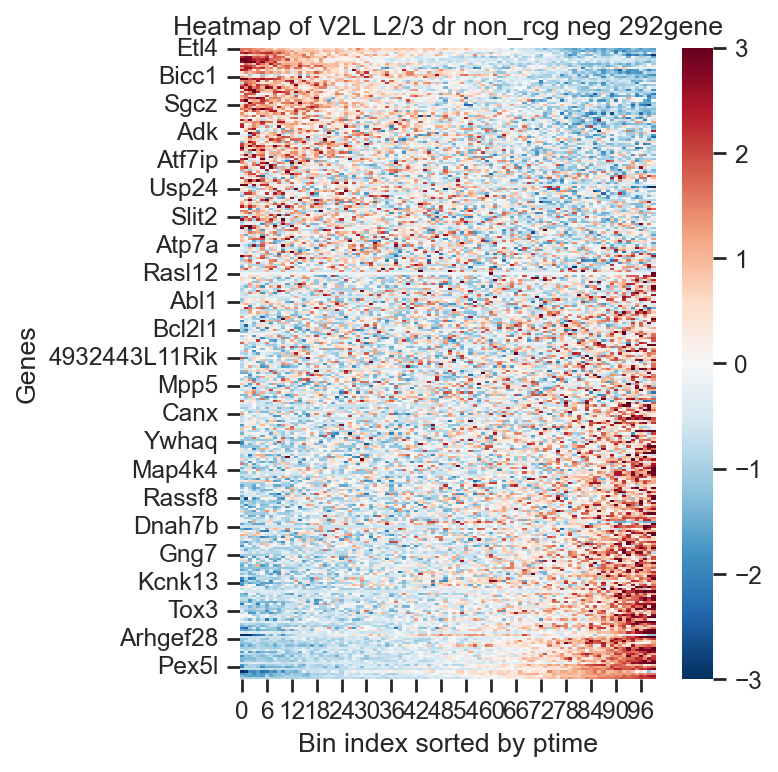

In [50]:
dr_non_rcg_sorted_neg_zscore = dr_non_rcg_sorted_neg.apply(zscore, axis=1)

plt.figure(figsize=(5,5))
sns.heatmap(dr_non_rcg_sorted_neg_zscore, cmap='RdBu_r', fmt='.2f',vmin=-3,vmax=3)
plt.title('Heatmap of V2L L2/3 dr non_rcg neg 292gene')
plt.xlabel('Bin index sorted by ptime')
plt.ylabel('Genes')
plt.tight_layout()

plt.savefig('Heatmap_of_V2L_L23_DR_non_RCG_neg_sorterd.pdf')

In [20]:
with open('V2L_L23_Non_RCG_neg_ordered.xls', 'w') as f:
    for i in nr_non_rcg_sorted_neg.index:
        f.write(f'{i}\n')

In [20]:
with open('V2L_L23_Non_RCG_pos_ordered.xls', 'w') as f:
    for i in nr_non_rcg_sorted_pos.index:
        f.write(f'{i}\n')

In [22]:
with open('V2L_L23_RCG_neg_ordered.xls', 'w') as f:
    for i in nr_rcg_sorted_neg.index:
        f.write(f'{i}\n')

In [19]:
with open('V2L_L23_RCG_pos_ordered.xls', 'w') as f:
    for i in nr_rcg_sorted_pos.index:
        f.write(f'{i}\n')